In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Thennarasu\OneDrive\Documents\dataset\Employee-Attrition - Employee-Attrition.csv")

In [ ]:
df

In [ ]:
df.isnull().sum()

In [28]:
# Count total duplicate rows
df.duplicated().sum()


np.int64(0)

In [3]:
df.drop(columns=['Over18', 'StandardHours', 'EmployeeCount'], inplace=True)

In [8]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [ ]:
df.dtypes

In [9]:
from sklearn.preprocessing import LabelEncoder
for col in df.select_dtypes(include='object'):
    df[col] = LabelEncoder().fit_transform(df[col])

In [ ]:
df.dtypes

In [10]:
    ##  Target & Features ##

X = df.drop('Attrition', axis=1)
y = df['Attrition']


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
#load a logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

e:\data\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
y_pred = lr.predict(X_test)       # Predict class labels



In [14]:
from sklearn.metrics import  classification_report

print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       245
           1       1.00      0.02      0.04        49

    accuracy                           0.84       294
   macro avg       0.92      0.51      0.48       294
weighted avg       0.86      0.84      0.77       294



In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
y_pred = rf.predict(X_test)


In [17]:
from sklearn.metrics import classification_report

print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       245
           1       0.67      0.12      0.21        49

    accuracy                           0.84       294
   macro avg       0.76      0.56      0.56       294
weighted avg       0.82      0.84      0.80       294



In [18]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)

dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred = dt.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:\n", classification_report(y_test, y_pred))


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [20]:
# Apply SMOTE for balancing
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [21]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(class_weight='balanced', random_state=42)

In [22]:
# Train model
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predict & evaluate
y_pred = model.predict(X_test)

print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))




📊 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       250
           1       0.92      0.91      0.92       244

    accuracy                           0.92       494
   macro avg       0.92      0.92      0.92       494
weighted avg       0.92      0.92      0.92       494



In [24]:
# Distribution of Attrition
df['Attrition'].value_counts(normalize=True) * 100


Attrition
0    83.877551
1    16.122449
Name: proportion, dtype: float64

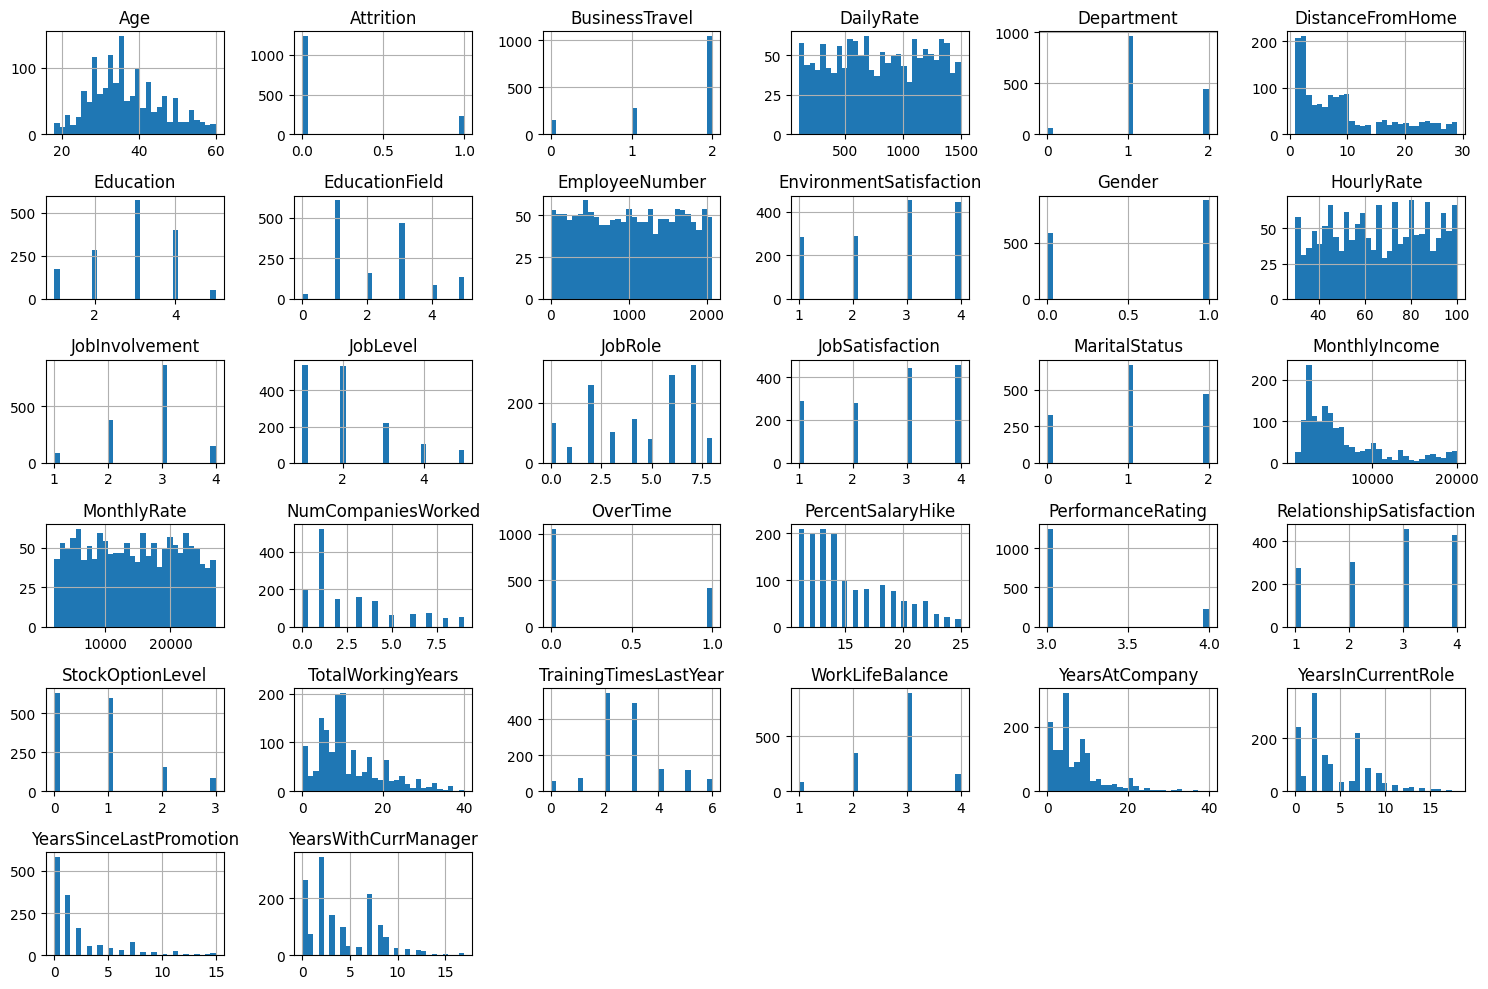

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df.select_dtypes(include='number').hist(figsize=(15,10), bins=30)
plt.tight_layout()
plt.show()


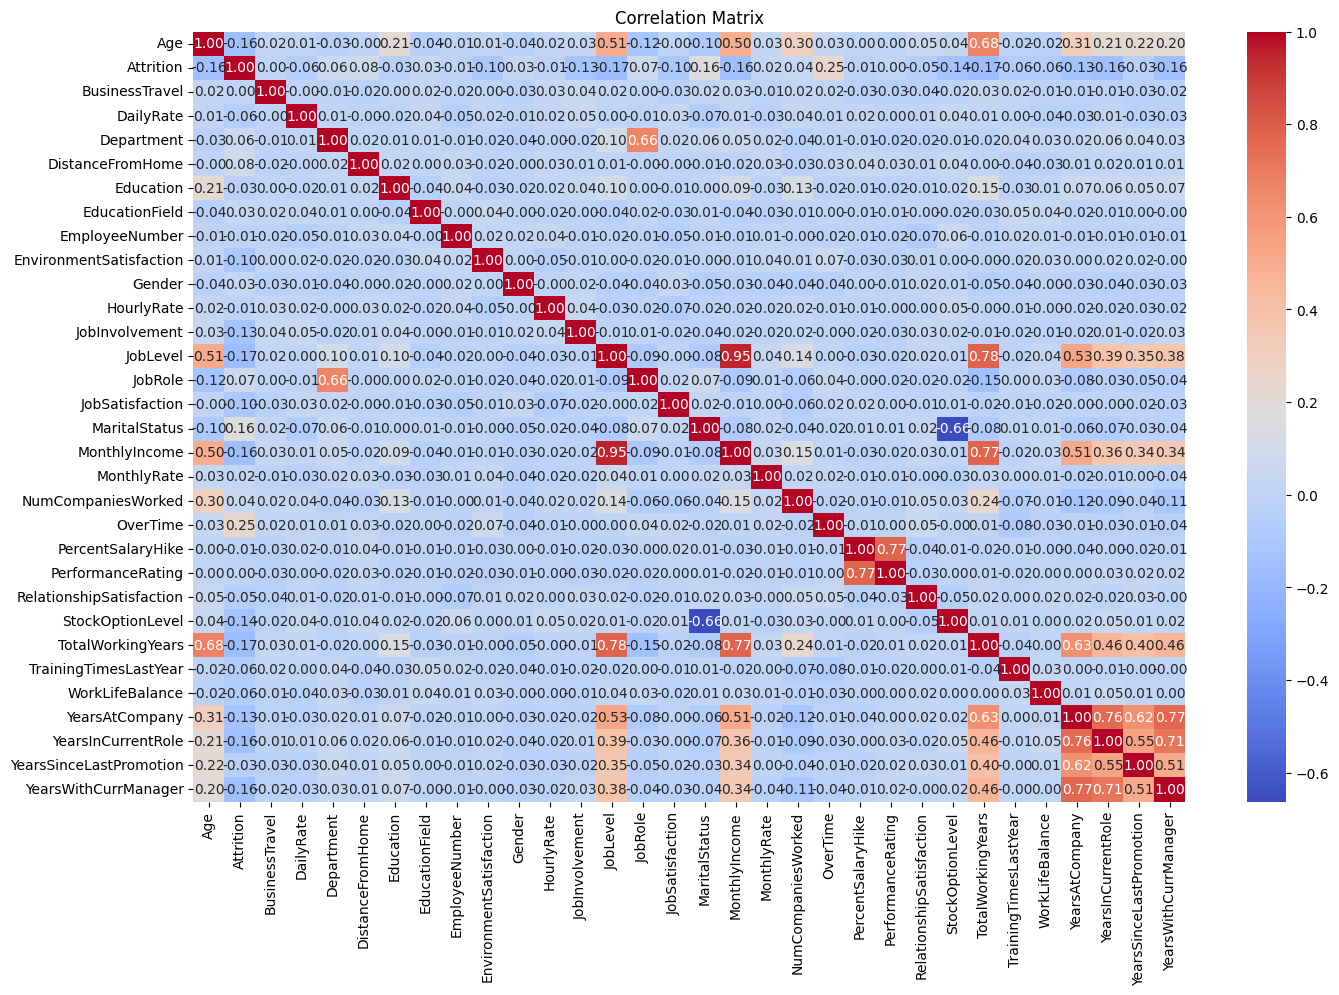

In [25]:
plt.figure(figsize=(16,10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


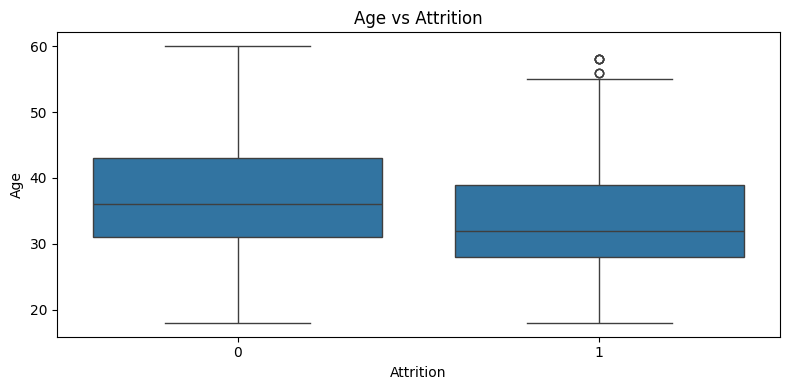

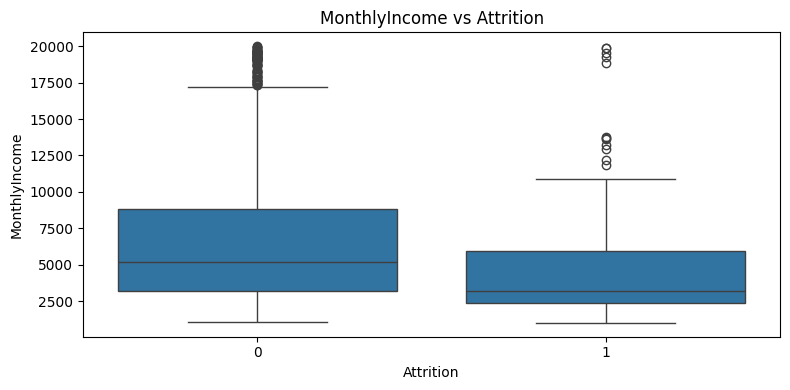

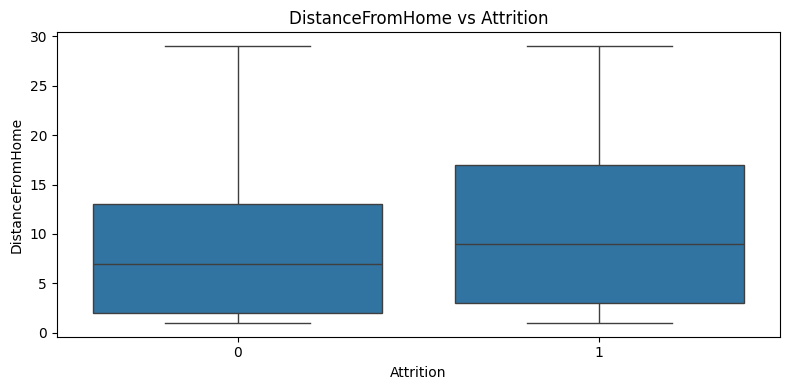

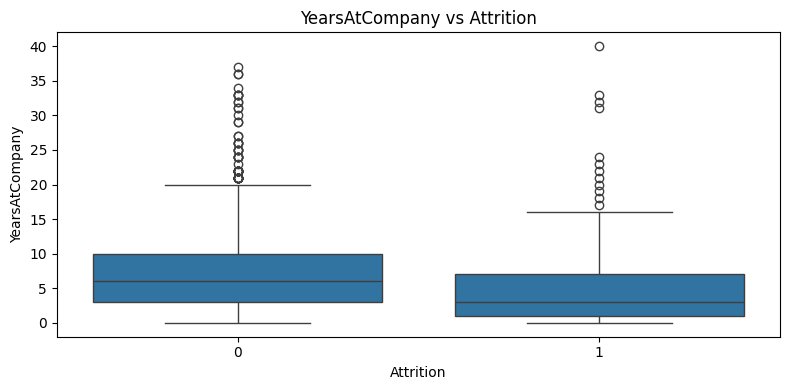

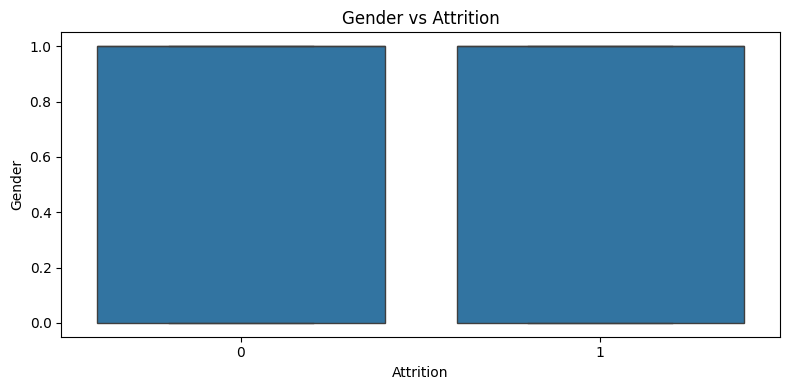

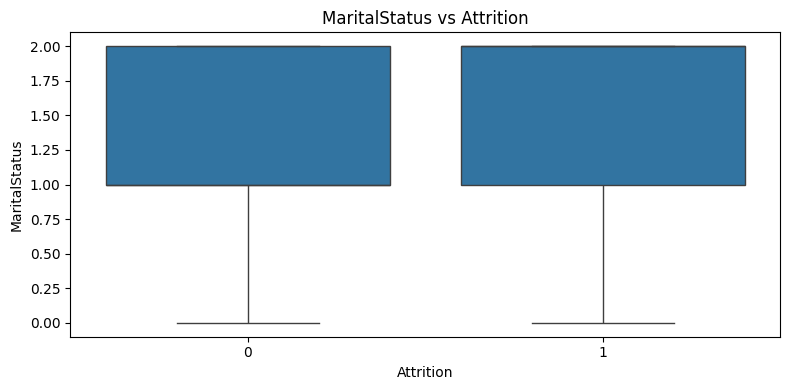

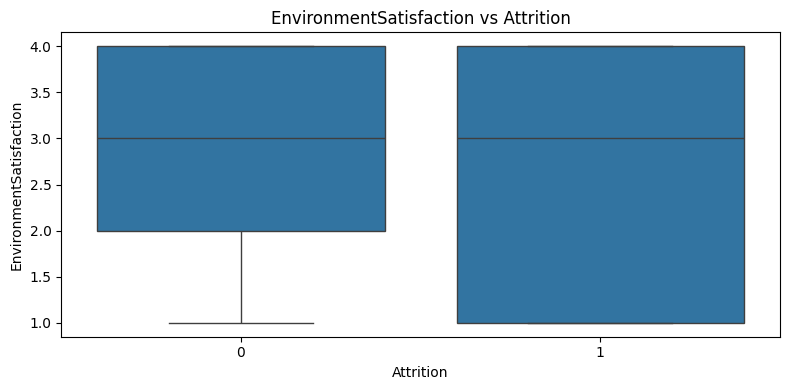

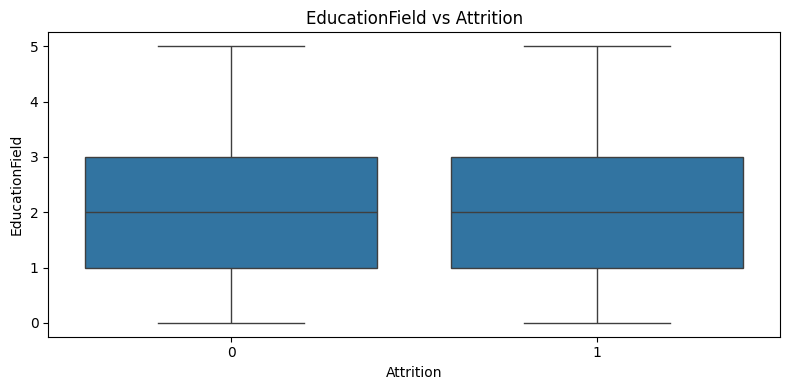

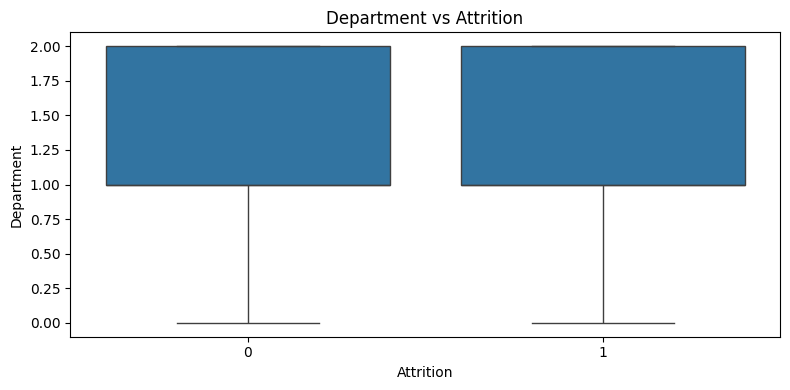

In [30]:
selected_cols = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'YearsAtCompany','Gender','MaritalStatus','EnvironmentSatisfaction','EducationField','Department']  # choose your own

for col in selected_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Attrition', y=col, data=df)
    plt.title(f"{col} vs Attrition")
    plt.tight_layout()
    plt.show()